<a href="https://colab.research.google.com/github/gouriiiiie/Credit_Card-Fraud-Detection_Transcation-level_Fraud-Analysis/blob/main/Credit_Card_Fraud_Detection_Transcation_Level_Fraud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✔ Credit Card Fraud Dataset Loaded Successfully!

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141

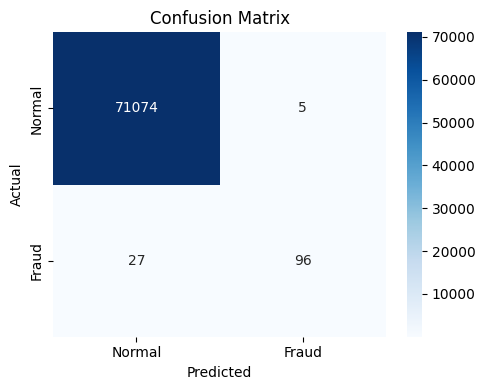

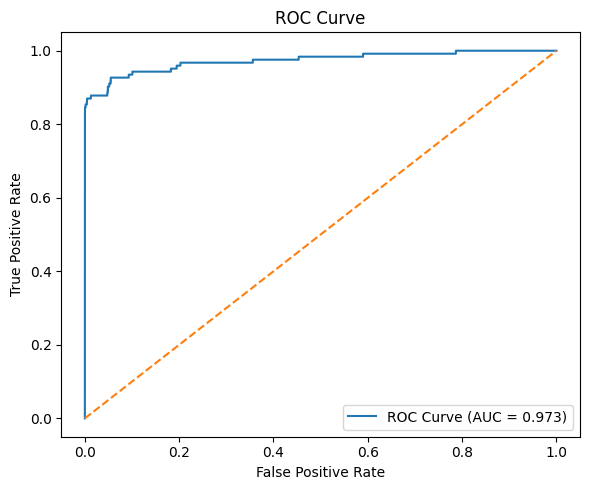

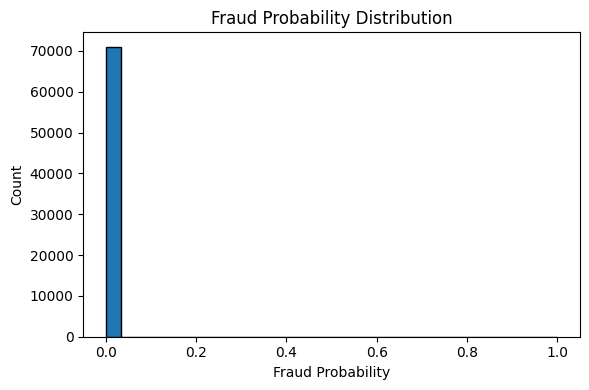


=== SAMPLE TRANSACTION FRAUD PREDICTION ===
Fraud Prediction : 0
Fraud Probability: 0.12872126199464276


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)


df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

print("✔ Credit Card Fraud Dataset Loaded Successfully!\n")
print(df.head())


X = df.drop("Class", axis=1)
y = df["Class"]

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns


preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols)
    ]
)


model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(
        n_estimators=250,
        max_depth=10,
        random_state=42
    ))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n============= CREDIT CARD FRAUD DETECTION MODEL PERFORMANCE ============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("================================================================\n")



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.hist(y_prob, bins=30, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



sample = pd.DataFrame([{
    "Time": 100000,
    "V1": -1.23,
    "V2": 0.84,
    "V3": -2.03,
    "V4": 1.12,
    "V5": -0.45,
    "V6": 2.15,
    "V7": -1.73,
    "V8": 0.55,
    "V9": -0.17,
    "V10": 0.44,
    "V11": -1.04,
    "V12": 0.67,
    "V13": -0.38,
    "V14": 1.92,
    "V15": -0.08,
    "V16": 0.55,
    "V17": -2.77,
    "V18": 1.00,
    "V19": 0.34,
    "V20": -0.66,
    "V21": 1.77,
    "V22": -0.98,
    "V23": 0.41,
    "V24": -0.55,
    "V25": 0.73,
    "V26": -1.33,
    "V27": 0.22,
    "V28": -0.11,
    "Amount": 150.00
}])

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE TRANSACTION FRAUD PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)


In [ ]:
from google.colab import files

print("/content/drive/MyDrive/creditcard.csv:")
uploaded = files.upload()

if 'creditcard.csv' in uploaded:
    print("✔ 'creditcard.csv' uploaded successfully!")
else:
    print("✘ 'creditcard.csv' was not found in the uploaded files. Please try again.")
